##### Anthony Wilson
##### Milestone 2
##### 4/19/2020

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
import glob
# using this to pull all the csv file names from a folder
def get_csv_filenames(filePath):
    _list = []
    #throw an error when there is an issue with the file path
    try:
        _list =  glob.glob("*.csv")
    except:
            print("something is wrong with the file path")
    return _list

In [3]:
#this will just pull the data from the file path and create a data frame
def pull_data(_fileName_):
    #throw an error if the file doesn't work
    try:
        df = pd.read_csv(_fileName_, index_col=None, header=0)
        df["filename"] = _fileName_
        return df
    except:
        print("something is wrong with the file: {}".format(i))

In [4]:
#main pull for the files
def pull_create_dataFrame(filePath = os.getcwd()):
    #setting initial lists
    df = [] 
    _list = []
    
    # if directory does not equal the main directory, create placeholder
    placeholder = os.getcwd()
    
    #make sure directory works
    if os.getcwd() != filePath: 
        try:
            os.chdir(filePath) #set new file path to pull
        #throw error if there is an issue
        except:
            print("something is wrong with the file path")
    #send filepath and collect file names      
    _list = get_csv_filenames(filePath)

    #if the list is empty throw an error 
    assert _list != [], 'The list is empty check the folder location for data {}'.format(filePath)
    
    #pull files one at a time create a main dataframe
    for i in _list:
        df.append(pull_data(i))
    #bring the tables together   
    df = pd.concat(df, axis=0, ignore_index=True) 
    
    #reset the directory back to what it was 
    os.chdir(placeholder)
    
    return df

In [5]:
#call function and pull all files from folder location that were downloaded from: https://washdata.org/data/healthcare#!/
df_wash = pull_create_dataFrame(os.getcwd() + '\\Milestone 2')
df_wash.head()

,ISO3,Country,Residence / Facility Type,Service Type,Year,Coverage,Population,Service level,filename
0,AFG,Afghanistan,total,Environmental cleaning,2000,100.0,20093756.0,Insufficient data,washdash-download_2000.csv
1,AFG,Afghanistan,urban,Environmental cleaning,2000,100.0,4436299.5,Insufficient data,washdash-download_2000.csv
2,AFG,Afghanistan,rural,Environmental cleaning,2000,100.0,15657457.0,Insufficient data,washdash-download_2000.csv
3,AFG,Afghanistan,hospital,Environmental cleaning,2000,100.0,20093756.0,Insufficient data,washdash-download_2000.csv
4,AFG,Afghanistan,non_hospital,Environmental cleaning,2000,100.0,20093756.0,Insufficient data,washdash-download_2000.csv


In [6]:
df_wash.filename.value_counts()

washdash-download_2016_2015.csv    12382
washdash-download_2014_2013.csv    12364
washdash-download_2012.csv          5950
washdash-download_2011.csv          5888
washdash-download_2010.csv          5800
washdash-download_2009.csv          5507
washdash-download_2008.csv          5315
washdash-download_2007.csv          5172
washdash-download_2006.csv          5091
washdash-download_2005.csv          4937
washdash-download_2004.csv          4866
washdash-download_2003.csv          4856
washdash-download_2002.csv          4824
washdash-download_2001.csv          4776
washdash-download_2000.csv          4763
Name: filename, dtype: int64

In [7]:
# Replace Headers
df_wash = df_wash.rename(columns = {'ISO3':'CNTRY_CD','Country':'CNTRY' ,'Residence / Facility Type': 'FCLT_TYPE'
                     , 'Service Type': 'SRVC_TYPE', 'Year':'YR', 'Coverage':'CVRG', 'Population':'PPLTN'
                     , 'Service level': 'SRVC_LVL'})
df_wash.head()

,CNTRY_CD,CNTRY,FCLT_TYPE,SRVC_TYPE,YR,CVRG,PPLTN,SRVC_LVL,filename
0,AFG,Afghanistan,total,Environmental cleaning,2000,100.0,20093756.0,Insufficient data,washdash-download_2000.csv
1,AFG,Afghanistan,urban,Environmental cleaning,2000,100.0,4436299.5,Insufficient data,washdash-download_2000.csv
2,AFG,Afghanistan,rural,Environmental cleaning,2000,100.0,15657457.0,Insufficient data,washdash-download_2000.csv
3,AFG,Afghanistan,hospital,Environmental cleaning,2000,100.0,20093756.0,Insufficient data,washdash-download_2000.csv
4,AFG,Afghanistan,non_hospital,Environmental cleaning,2000,100.0,20093756.0,Insufficient data,washdash-download_2000.csv


In [8]:
# Format data into a more readable format
# Right now I am only interested in the Hygiene data, but this is subject to change if there is not 
# enough data
df_wash = df_wash[df_wash['SRVC_TYPE'] == 'Hygiene']
df_wash.head()

,CNTRY_CD,CNTRY,FCLT_TYPE,SRVC_TYPE,YR,CVRG,PPLTN,SRVC_LVL,filename
7,AFG,Afghanistan,total,Hygiene,2000,100.0,20093756.0,Insufficient data,washdash-download_2000.csv
8,AFG,Afghanistan,urban,Hygiene,2000,100.0,4436299.5,Insufficient data,washdash-download_2000.csv
9,AFG,Afghanistan,rural,Hygiene,2000,100.0,15657457.0,Insufficient data,washdash-download_2000.csv
10,AFG,Afghanistan,hospital,Hygiene,2000,100.0,20093756.0,Insufficient data,washdash-download_2000.csv
11,AFG,Afghanistan,non_hospital,Hygiene,2000,100.0,20093756.0,Insufficient data,washdash-download_2000.csv


I want each country to have just one row per year. The years go from 2000-2016. I am going keep country code (CNTRY_CD), Facility Type (FCLT_TYPE),  Year (YR), Coverage (CVRG), Population (PPLTN) and Service Level (SRVC_LVL). Country is duplicated by country code, so no need to keep it. We don't need SRVC_TYPE, because we are only looking at hygiene. Finally, we don't need filename, it was just used for validating that all the data loaded. 
<br><br>
I want to group the data so that each country has its own row, per year. I will take FCLT_TYPE and SRVC_LVL and make them wide with CVRG as the variable. If we need to know the actual population numbers we can muptiply the population by the coverage of each. I am going to combine FCLT_TYPE with SRVC_LVL. For example based on the data above for the first row it would look as follows: <br><br>

<table style="width:100%">
  <tr>
    <th>CNTRY_CD</th>
    <th>YR</th>
    <th>PPLTN</th>
    <th>total_insufficient_data</th>
    <th>urban_Insufficient_data</th>
    <th>...</th>
  </tr>
  <tr>
    <td>AFG</td>
    <td>2000</td>
    <td>20093756.0</td>
    <td>100</td>
    <td>100</td>
    <td>...</td>
  </tr>
</table>

In [9]:
#summing up just the facility type = total, this is the total for everythign based on popultaion to start the table
df_wash1 = df_wash[df_wash.FCLT_TYPE == 'total'].groupby(['CNTRY_CD', 'YR'], as_index = False).agg({'PPLTN':'sum'})
# df_wash1 = pd.DataFrame(df_wash1, index = pd.MultiIndex.from_frame(df_wash1[['CNTRY_CD','YR']]))
df_wash1.set_index(['CNTRY_CD','YR'], inplace=True) 
df_wash1.head(10)

PPLTN
CNTRY_CD YR              
AFG      2000  20093756.0
         2001  20966462.0
         2002  21979924.0
         2003  23064852.0
         2004  24118978.0
         2005  25070798.0
         2006  25893450.0
         2007  26616792.0
         2008  27294032.0
         2009  28004330.0

In [10]:
#using this to pivot the table so we don't have staked columns
df_wash2 = df_wash[['CNTRY_CD', 'YR', 'FCLT_TYPE', 'SRVC_LVL', 'CVRG']]
df_wash2 = pd.pivot_table(df_wash2, values = ['CVRG'], index = ['CNTRY_CD', 'YR'], columns = ['FCLT_TYPE', 'SRVC_LVL'])

In [11]:
#looping through FCLT_TYPE and SRVC_LVL as the multindex and setting the columns as the two values combined
for i in range(len(df_wash2.CVRG.columns)):
    df_wash1[df_wash2.CVRG.columns[i][0] + '_' + df_wash2.CVRG.columns[i][1].replace(' ', '_')] = np.array(df_wash2.CVRG[df_wash2.CVRG.columns[i][0]][df_wash2.CVRG.columns[i][1]].reset_index(drop=True))  
df_wash1.head()   

PPLTN  government_Basic_service  \
CNTRY_CD YR                                           
AFG      2000  20093756.0                       NaN   
         2001  20966462.0                       NaN   
         2002  21979924.0                       NaN   
         2003  23064852.0                       NaN   
         2004  24118978.0                       NaN   

               government_Insufficient_data  government_Limited_service  \
CNTRY_CD YR                                                               
AFG      2000                         100.0                         NaN   
         2001                         100.0                         NaN   
         2002                         100.0                         NaN   
         2003                         100.0                         NaN   
         2004                         100.0                         NaN   

               government_No_service  hospital_Basic_service  \
CNTRY_CD YR                                                    
AFG      2000                    NaN                     NaN   
         2001                    NaN                     NaN   
         2002                    NaN                     NaN   
         2003                    NaN                     NaN   
         2004                    NaN                     NaN   

               hospital_Insufficient_data  hospital_Limited_service  \
CNTRY_CD YR                                                           
AFG      2000                       100.0                       NaN   
         2001                       100.0                       NaN   
         2002                       100.0                       NaN   
         2003                       100.0                       NaN   
         2004                       100.0                       NaN   

               hospital_No_service  non_government_Basic_service  ...  \
CNTRY_CD YR                                                       ...   
AFG      2000                  NaN                           NaN  ...   
         2001                  NaN                           NaN  ...   
         2002                  NaN                           NaN  ...   
         2003                  NaN                           NaN  ...   
         2004                  NaN                           NaN  ...   

               rural_Limited_service  rural_No_service  total_Basic_service  \
CNTRY_CD YR                                                                   
AFG      2000                    NaN               NaN                  NaN   
         2001                    NaN               NaN                  NaN   
         2002                    NaN               NaN                  NaN   
         2003                    NaN               NaN                  NaN   
         2004                    NaN               NaN                  NaN   

               total_Insufficient_data  total_Limited_service  \
CNTRY_CD YR                                                     
AFG      2000                    100.0                    NaN   
         2001                    100.0                    NaN   
         2002                    100.0                    NaN   
         2003                    100.0                    NaN   
         2004                    100.0                    NaN   

               total_No_service  urban_Basic_service  urban_Insufficient_data  \
CNTRY_CD YR                                                                     
AFG      2000               NaN                  NaN                    100.0   
         2001               NaN                  NaN                    100.0   
         2002               NaN                  NaN                    100.0   
         2003               NaN                  NaN                    100.0   
         2004               NaN                  NaN                    100.0   

               urban_Limited_service  urban_No_service  
CNTRY_CD YR   

In [12]:
#reordering the data so that it flows better, urban/rural combintation first hospital/non_hospital, then government/non_government and the total
# each combintaion above besides total should sum up to total if there is data for it.
df_wash1 = df_wash1[['PPLTN', 'urban_Basic_service', 'urban_Insufficient_data', 'urban_Limited_service', 'urban_No_service', 'rural_Basic_service', 'rural_Insufficient_data', 'rural_Limited_service', 'rural_No_service', 'hospital_Basic_service', 'hospital_Insufficient_data', 'hospital_Limited_service', 'hospital_No_service', 'non_hospital_Basic_service', 'non_hospital_Insufficient_data', 'non_hospital_Limited_service', 'non_hospital_No_service', 'government_Basic_service', 'government_Insufficient_data', 'government_Limited_service', 'government_No_service', 'non_government_Basic_service', 'non_government_Insufficient_data', 'non_government_Limited_service', 'non_government_No_service', 'total_Basic_service', 'total_Insufficient_data', 'total_Limited_service', 'total_No_service']]
df_wash1.head(10)

PPLTN  urban_Basic_service  urban_Insufficient_data  \
CNTRY_CD YR                                                               
AFG      2000  20093756.0                  NaN                    100.0   
         2001  20966462.0                  NaN                    100.0   
         2002  21979924.0                  NaN                    100.0   
         2003  23064852.0                  NaN                    100.0   
         2004  24118978.0                  NaN                    100.0   
         2005  25070798.0                  NaN                    100.0   
         2006  25893450.0                  NaN                    100.0   
         2007  26616792.0                  NaN                    100.0   
         2008  27294032.0                  NaN                    100.0   
         2009  28004330.0                  NaN                    100.0   

               urban_Limited_service  urban_No_service  rural_Basic_service  \
CNTRY_CD YR                                                                   
AFG      2000                    NaN               NaN                  NaN   
         2001                    NaN               NaN                  NaN   
         2002                    NaN               NaN                  NaN   
         2003                    NaN               NaN                  NaN   
         2004                    NaN               NaN                  NaN   
         2005                    NaN               NaN                  NaN   
         2006                    NaN               NaN                  NaN   
         2007                    NaN               NaN                  NaN   
         2008                    NaN               NaN                  NaN   
         2009                    NaN               NaN                  NaN   

               rural_Insufficient_data  rural_Limited_service  \
CNTRY_CD YR                                                     
AFG      2000                    100.0                    NaN   
         2001                    100.0                    NaN   
         2002                    100.0                    NaN   
         2003                    100.0                    NaN   
         2004                    100.0                    NaN   
         2005                    100.0                    NaN   
         2006                    100.0                    NaN   
         2007                    100.0                    NaN   
         2008                    100.0                    NaN   
         2009                    100.0                    NaN   

               rural_No_service  hospital_Basic_service  ...  \
CNTRY_CD YR                                              ...   
AFG      2000               NaN                     NaN  ...   
         2001               NaN                     NaN  ...   
         2002               NaN                     NaN  ...   
         2003               NaN                     NaN  ...   
         2004               NaN                     NaN  ...   
         2005               NaN                     NaN  ...   
         2006               NaN                     NaN  ...   
         2007               NaN                     NaN  ...   
         2008               NaN                     NaN  ...   
         2009               NaN                     NaN  ...   

               government_Limited_service  government_No_service  \
CNTRY_CD YR                                                        
AFG      2000                         NaN                    NaN   
         2001                         NaN                    NaN   
         2002                         NaN                    NaN   
         2003                         NaN                    NaN   
         2004                         NaN                    NaN   
         2005                         NaN                    NaN   
         2006                         NaN                    NaN   
        

In [13]:
#setting all NaN as 0 since they should sum up to 1 for the combinations. Also, creating another dataset where we drop na's.
df_wash3 = df_wash1.fillna(0)
df_wash3.head()

PPLTN  urban_Basic_service  urban_Insufficient_data  \
CNTRY_CD YR                                                               
AFG      2000  20093756.0                  0.0                    100.0   
         2001  20966462.0                  0.0                    100.0   
         2002  21979924.0                  0.0                    100.0   
         2003  23064852.0                  0.0                    100.0   
         2004  24118978.0                  0.0                    100.0   

               urban_Limited_service  urban_No_service  rural_Basic_service  \
CNTRY_CD YR                                                                   
AFG      2000                    0.0               0.0                  0.0   
         2001                    0.0               0.0                  0.0   
         2002                    0.0               0.0                  0.0   
         2003                    0.0               0.0                  0.0   
         2004                    0.0               0.0                  0.0   

               rural_Insufficient_data  rural_Limited_service  \
CNTRY_CD YR                                                     
AFG      2000                    100.0                    0.0   
         2001                    100.0                    0.0   
         2002                    100.0                    0.0   
         2003                    100.0                    0.0   
         2004                    100.0                    0.0   

               rural_No_service  hospital_Basic_service  ...  \
CNTRY_CD YR                                              ...   
AFG      2000               0.0                     0.0  ...   
         2001               0.0                     0.0  ...   
         2002               0.0                     0.0  ...   
         2003               0.0                     0.0  ...   
         2004               0.0                     0.0  ...   

               government_Limited_service  government_No_service  \
CNTRY_CD YR                                                        
AFG      2000                         0.0                    0.0   
         2001                         0.0                    0.0   
         2002                         0.0                    0.0   
         2003                         0.0                    0.0   
         2004                         0.0                    0.0   

               non_government_Basic_service  non_government_Insufficient_data  \
CNTRY_CD YR                                                                     
AFG      2000                           0.0                             100.0   
         2001                           0.0                             100.0   
         2002                           0.0                             100.0   
         2003                           0.0                             100.0   
         2004                           0.0                             100.0   

               non_government_Limited_service  non_government_No_service  \
CNTRY_CD YR                                                                
AFG      2000                             0.0                        0.0   
         2001                             0.0                        0.0   
         2002                             0.0                        0.0   
         2003                             0.0                        0.0   
         2004                             0.0                        0.0   

               total_Basic_service  total_Insufficient_data  \
CNTRY_CD YR                                                   
AFG      2000                  0.0                    100.0   
         2001                  0.0                    100.0   
         2002                  0.0                    100.0   
         2003                  0.0                    100.0   
         2004                  0.0                    100.0   

               

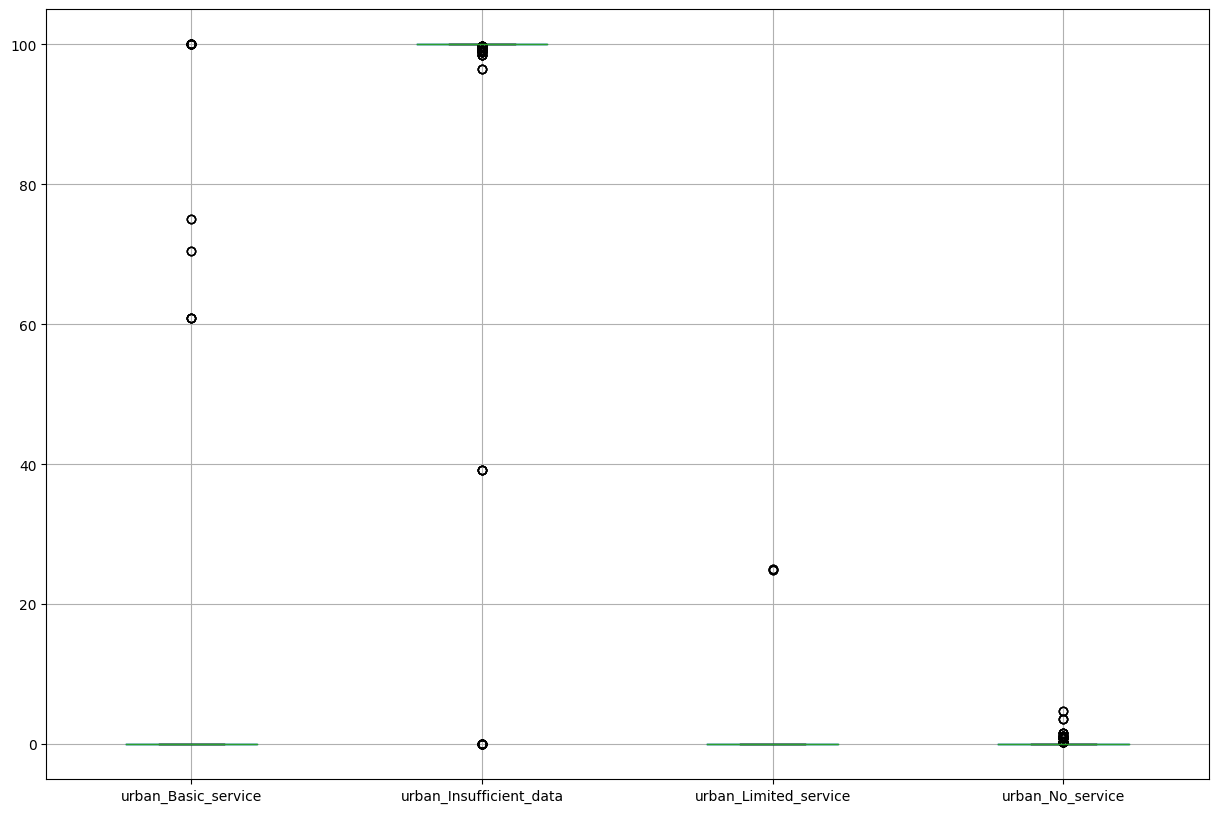

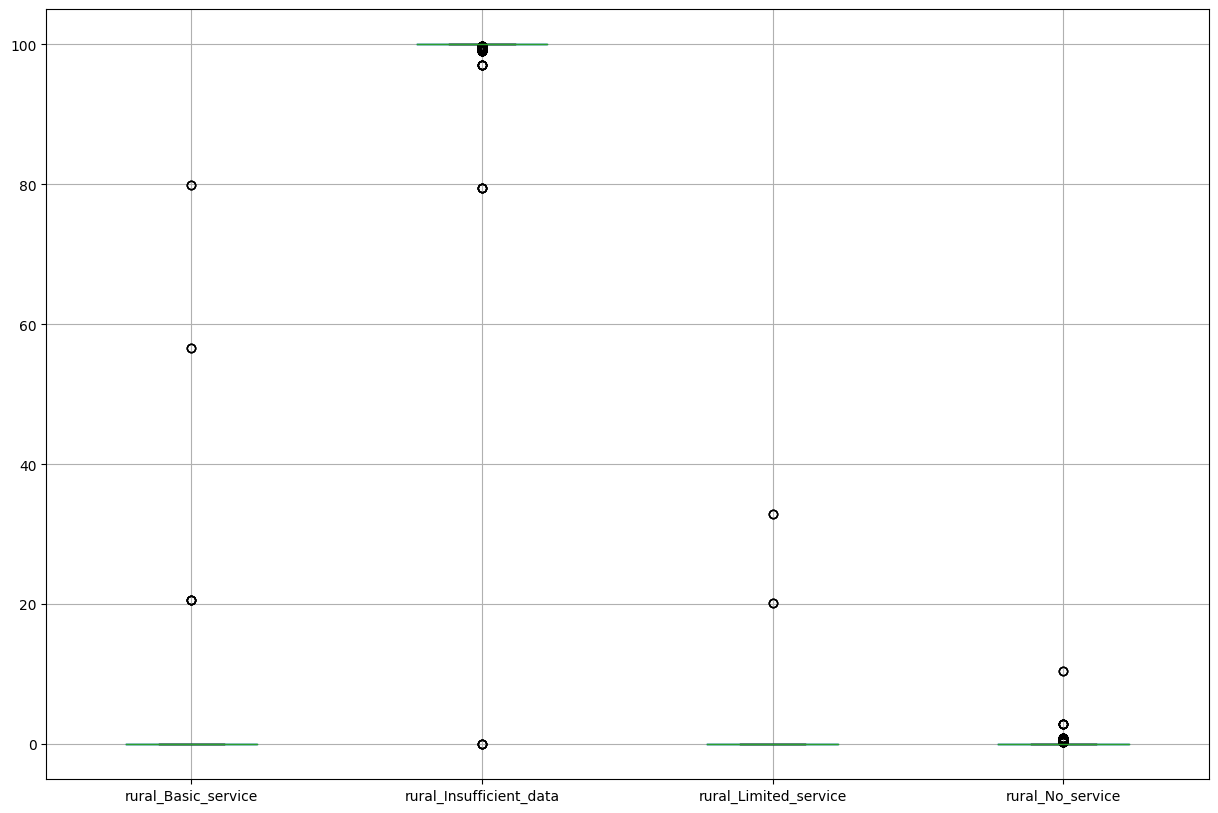

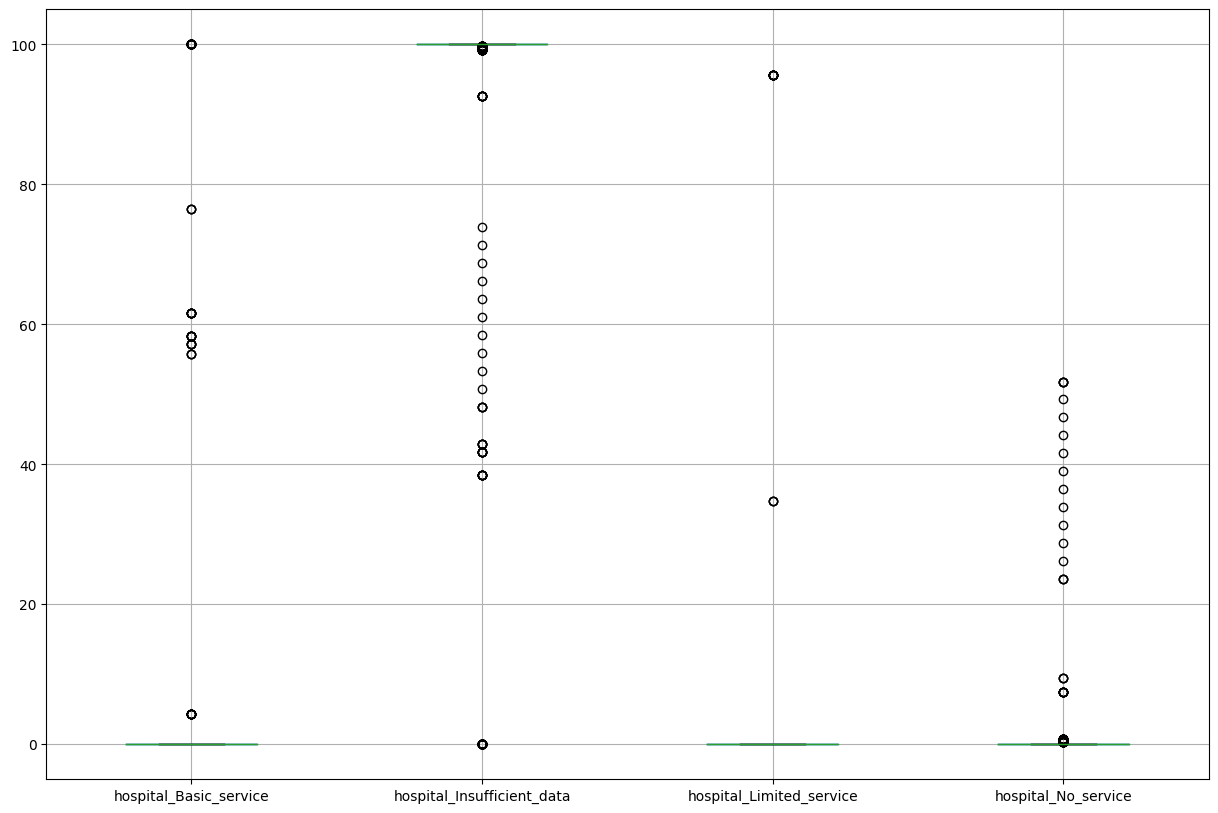

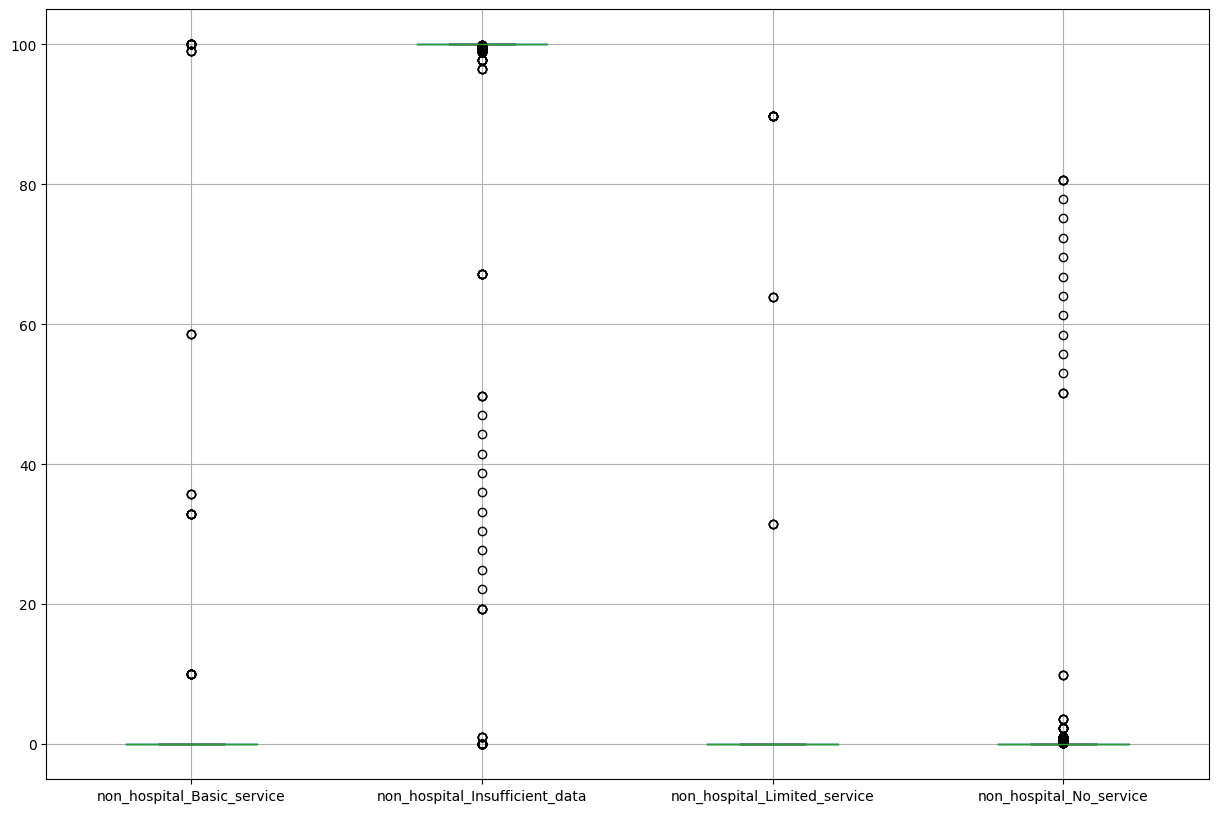

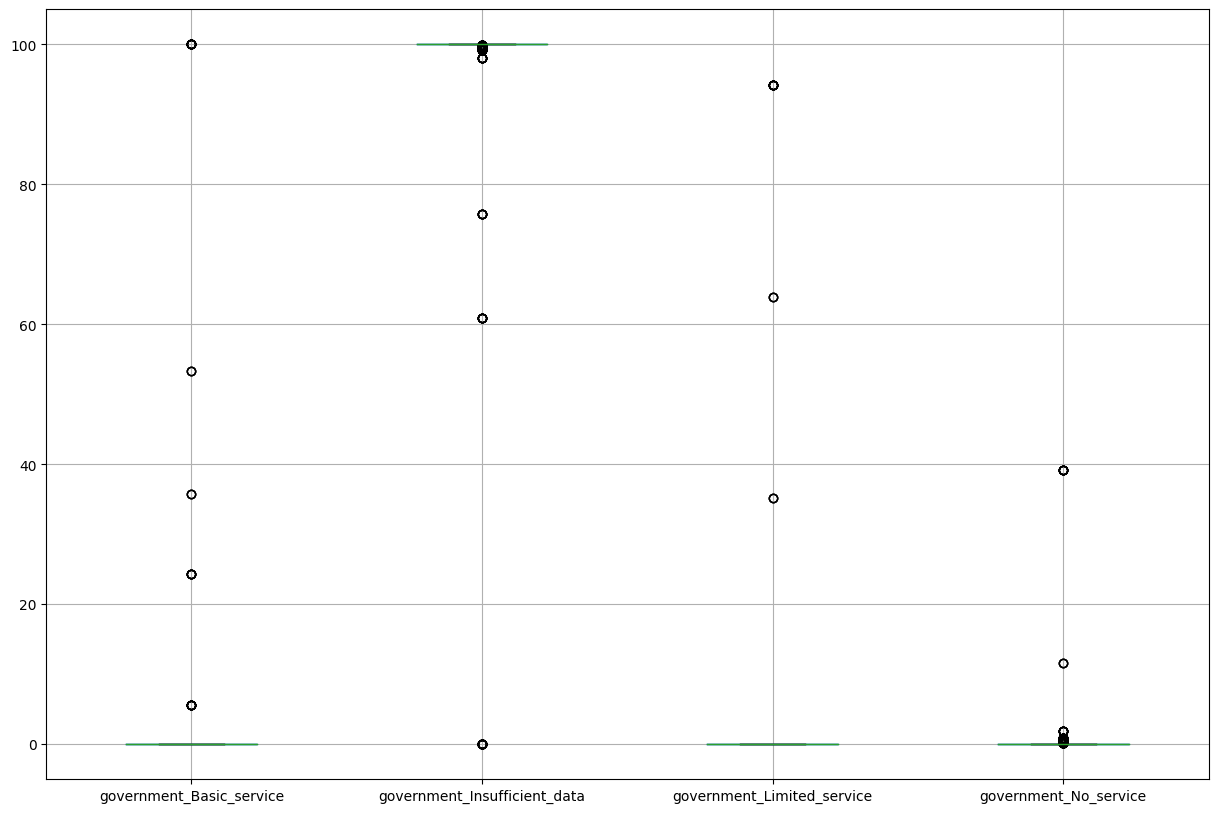

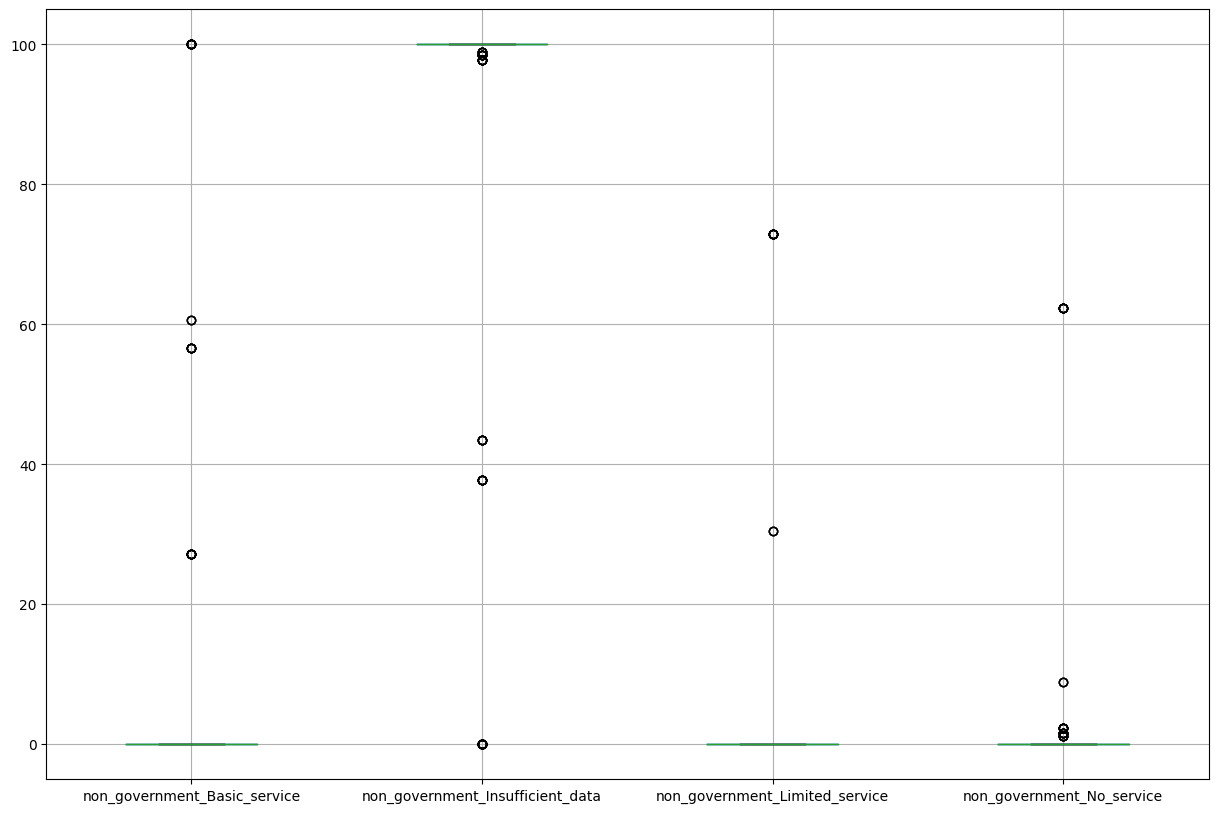

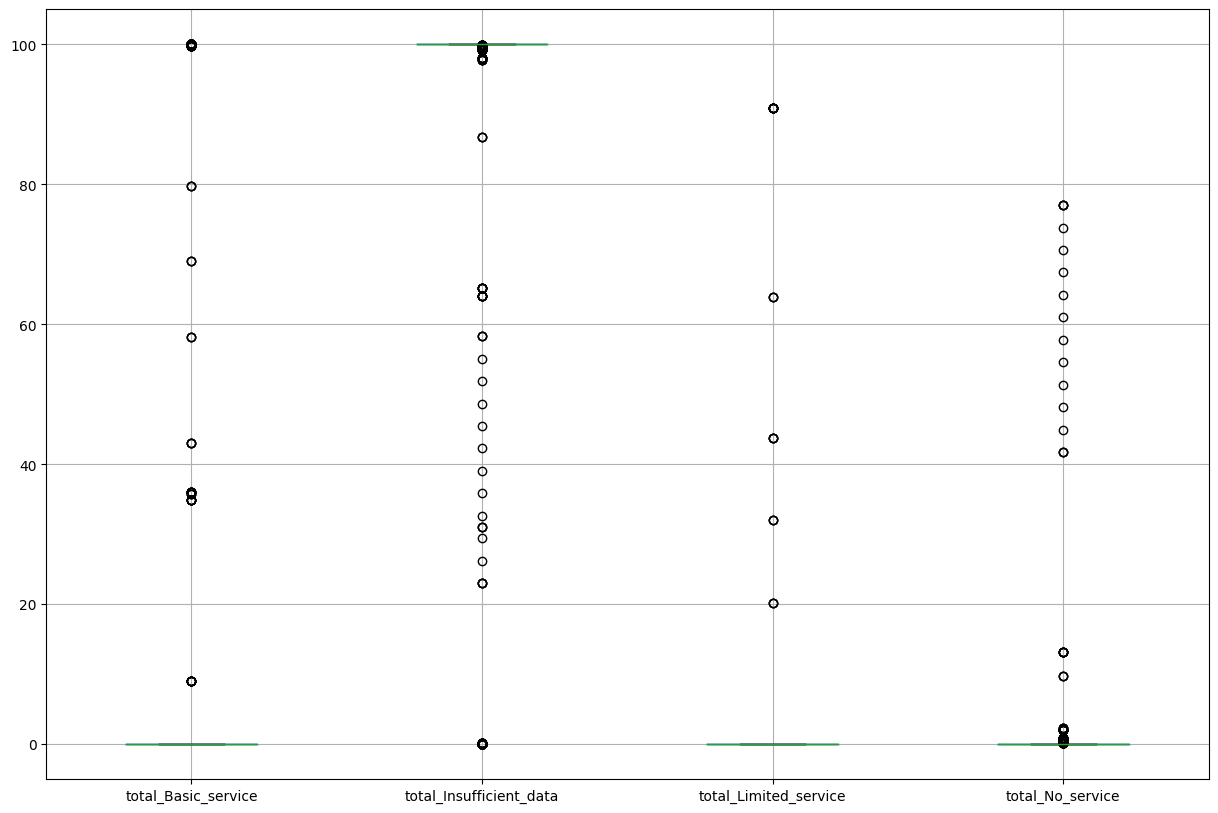

In [14]:
# Identify outliers and bad data 
for i in range(1,len(df_wash1.columns),4):
    df_wash3[df_wash3.columns[i:i+4]].boxplot(figsize = (15,10), fontsize = 10)
    plt.show()

In [15]:
# I don't know that any of the data looks all that great. I will try to dropna's, my concern here is we won't have anything left
df_wash4 = df_wash1.dropna()
df_wash4.head()

PPLTN  urban_Basic_service  urban_Insufficient_data  \
CNTRY_CD YR                                                               
ZWE      2014  15411675.0                 70.4                      0.0   
         2015  15777451.0                 70.4                      0.0   
         2016  16150362.0                 70.4                      0.0   

               urban_Limited_service  urban_No_service  rural_Basic_service  \
CNTRY_CD YR                                                                   
ZWE      2014                   24.9               4.7                 56.6   
         2015                   24.9               4.7                 56.6   
         2016                   24.9               4.7                 56.6   

               rural_Insufficient_data  rural_Limited_service  \
CNTRY_CD YR                                                     
ZWE      2014                      0.0                   32.9   
         2015                      0.0                   32.9   
         2016                      0.0                   32.9   

               rural_No_service  hospital_Basic_service  ...  \
CNTRY_CD YR                                              ...   
ZWE      2014              10.5                    55.8  ...   
         2015              10.5                    55.8  ...   
         2016              10.5                    55.8  ...   

               government_Limited_service  government_No_service  \
CNTRY_CD YR                                                        
ZWE      2014                        35.1                   11.6   
         2015                        35.1                   11.6   
         2016                        35.1                   11.6   

               non_government_Basic_service  non_government_Insufficient_data  \
CNTRY_CD YR                                                                     
ZWE      2014                          60.6                               0.0   
         2015                          60.6                               0.0   
         2016                          60.6                               0.0   

               non_government_Limited_service  non_government_No_service  \
CNTRY_CD YR                                                                
ZWE      2014                            30.5                        8.9   
         2015                            30.5                        8.9   
         2016                            30.5                        8.9   

               total_Basic_service  total_Insufficient_data  \
CNTRY_CD YR                                                   
ZWE      2014                 58.2                      0.0   
         2015                 58.2                      0.0   
         2016                 58.2                      0.0   

               total_Limited_service  total_No_service  
CNTRY_CD YR                                             
ZWE      2014                   32.0               9.8  
         2015                   32.0               9.8  
         2016                   32.0               9.8  

[3 rows x 29 columns]

In [16]:
df_wash5 = df_wash3.reset_index()[df_wash3.reset_index()['YR'] == 2016]
df_wash5.set_index(['CNTRY_CD','YR'], inplace=True) 

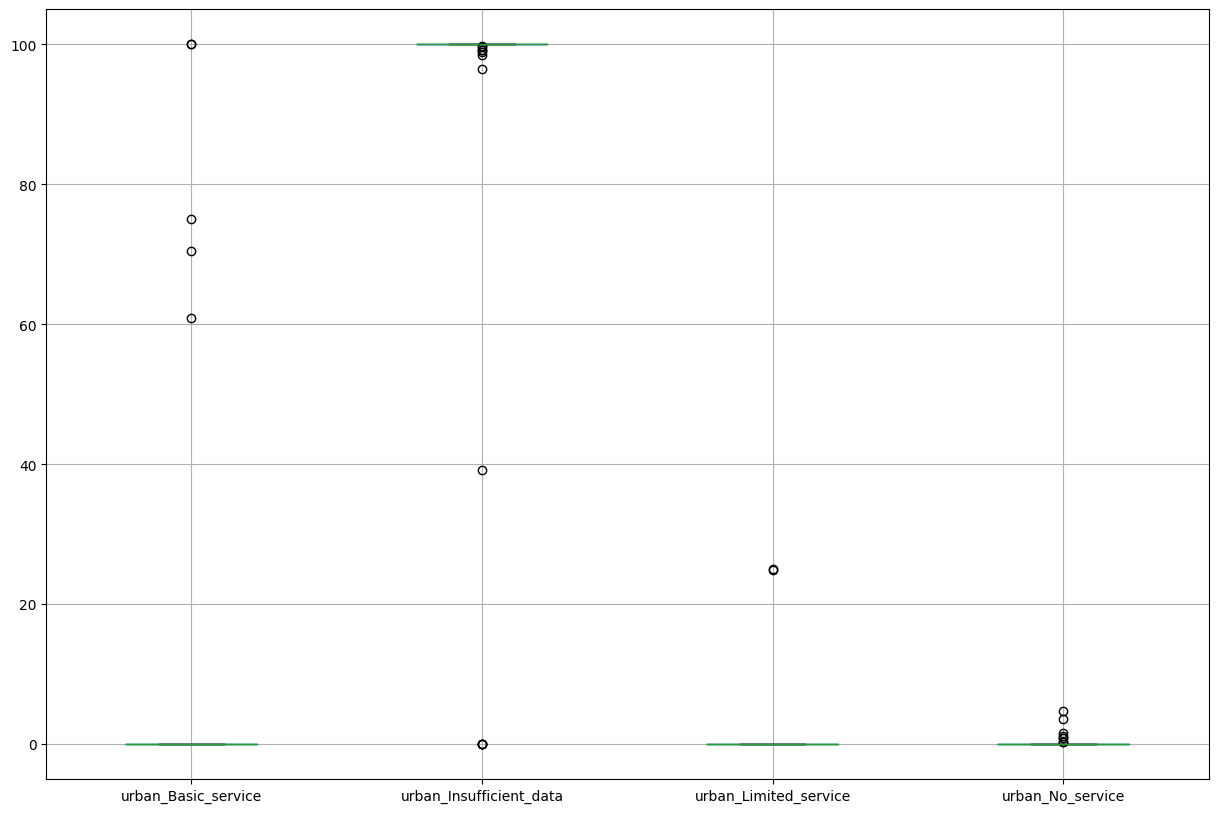

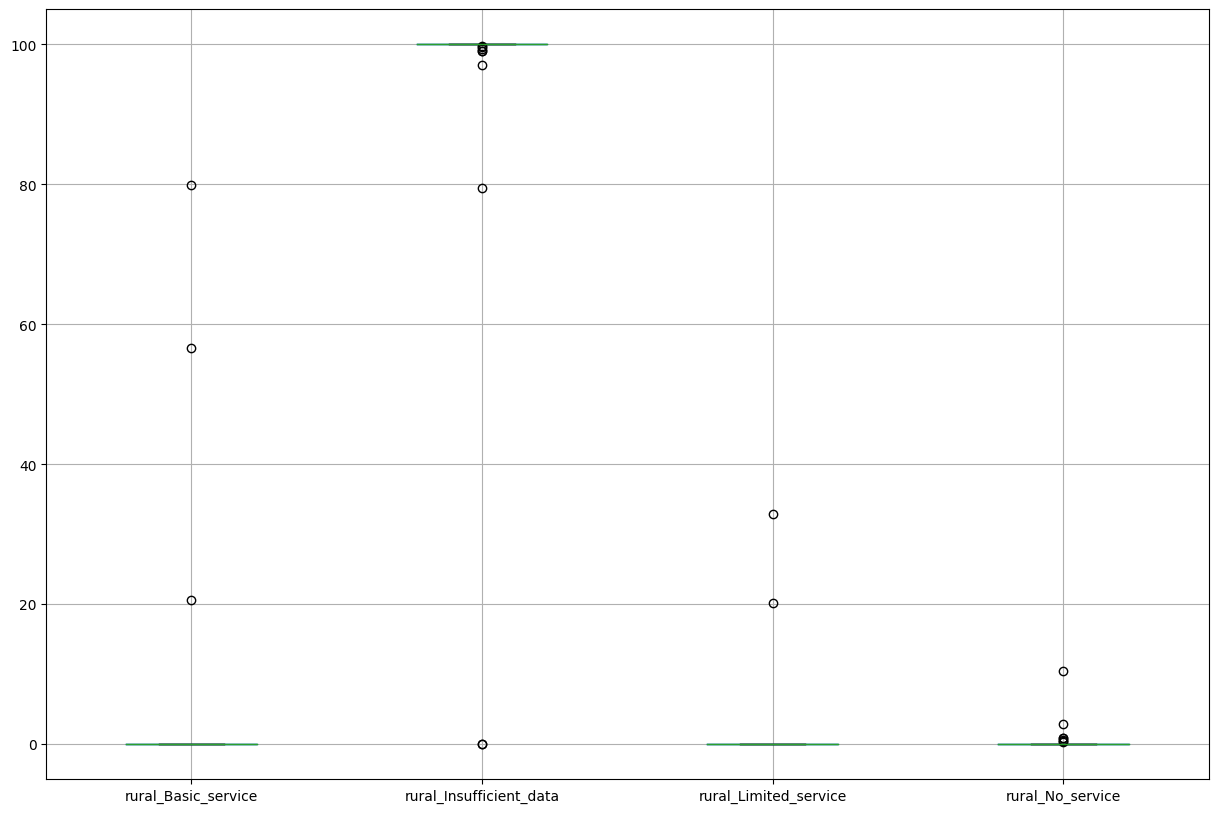

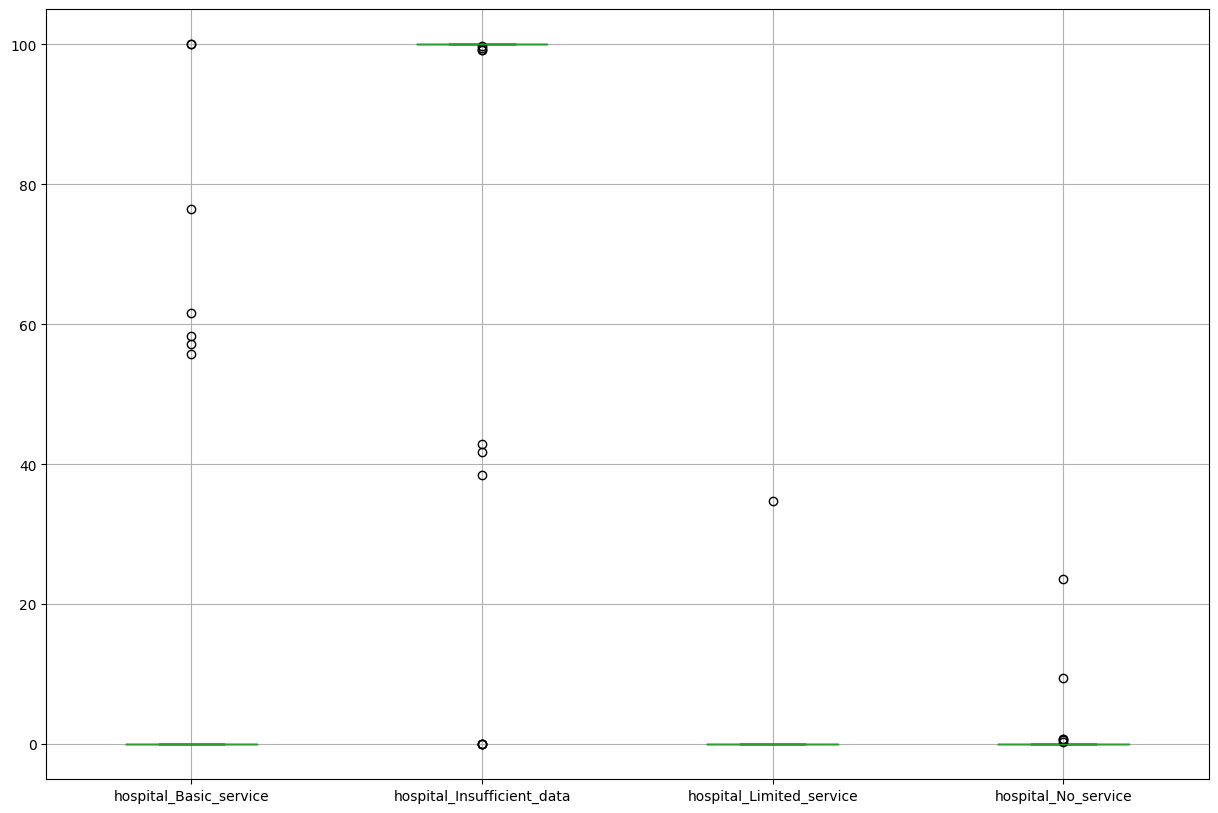

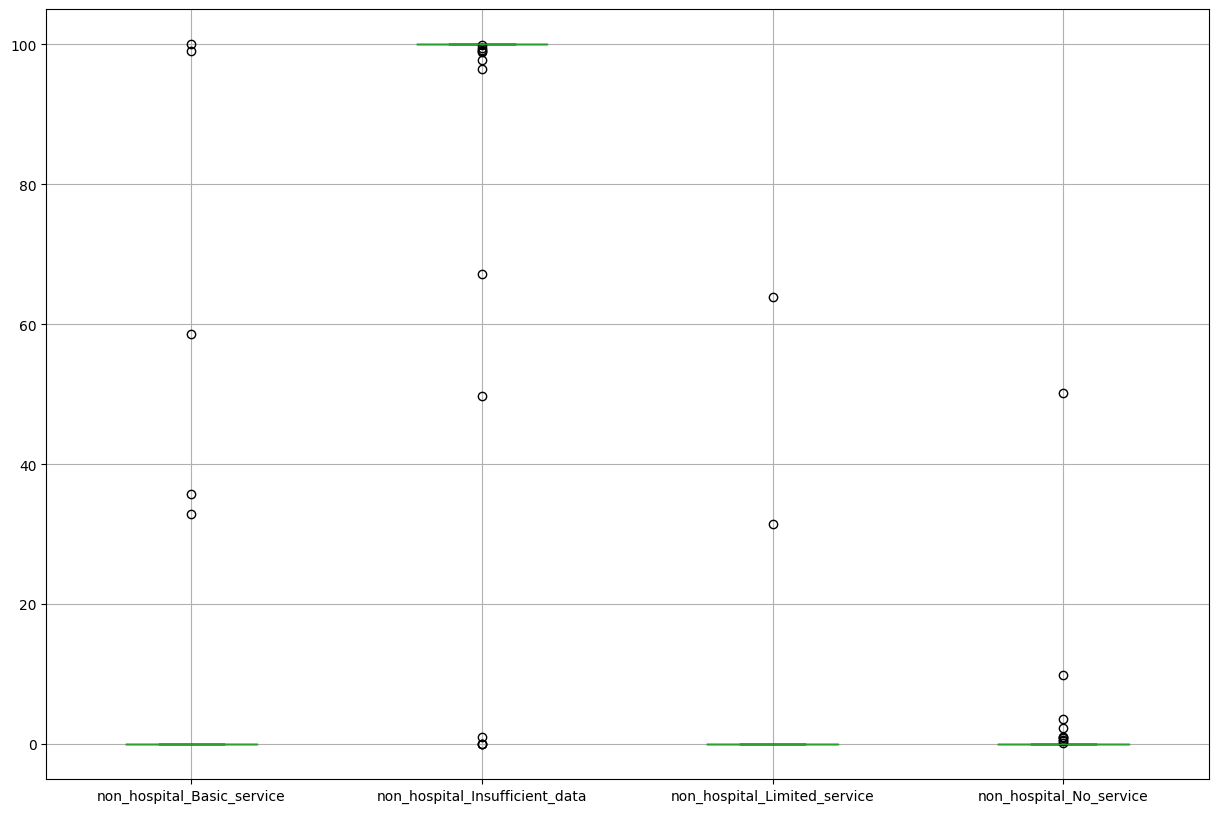

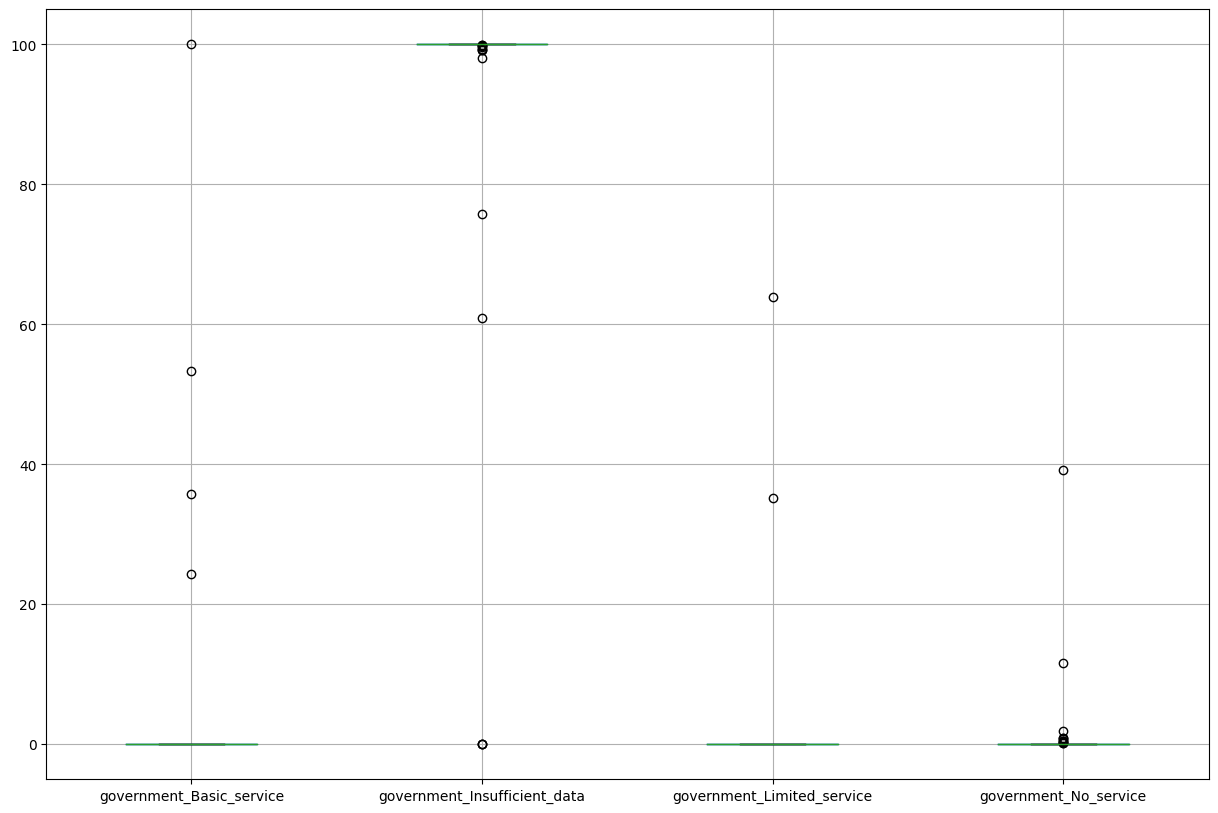

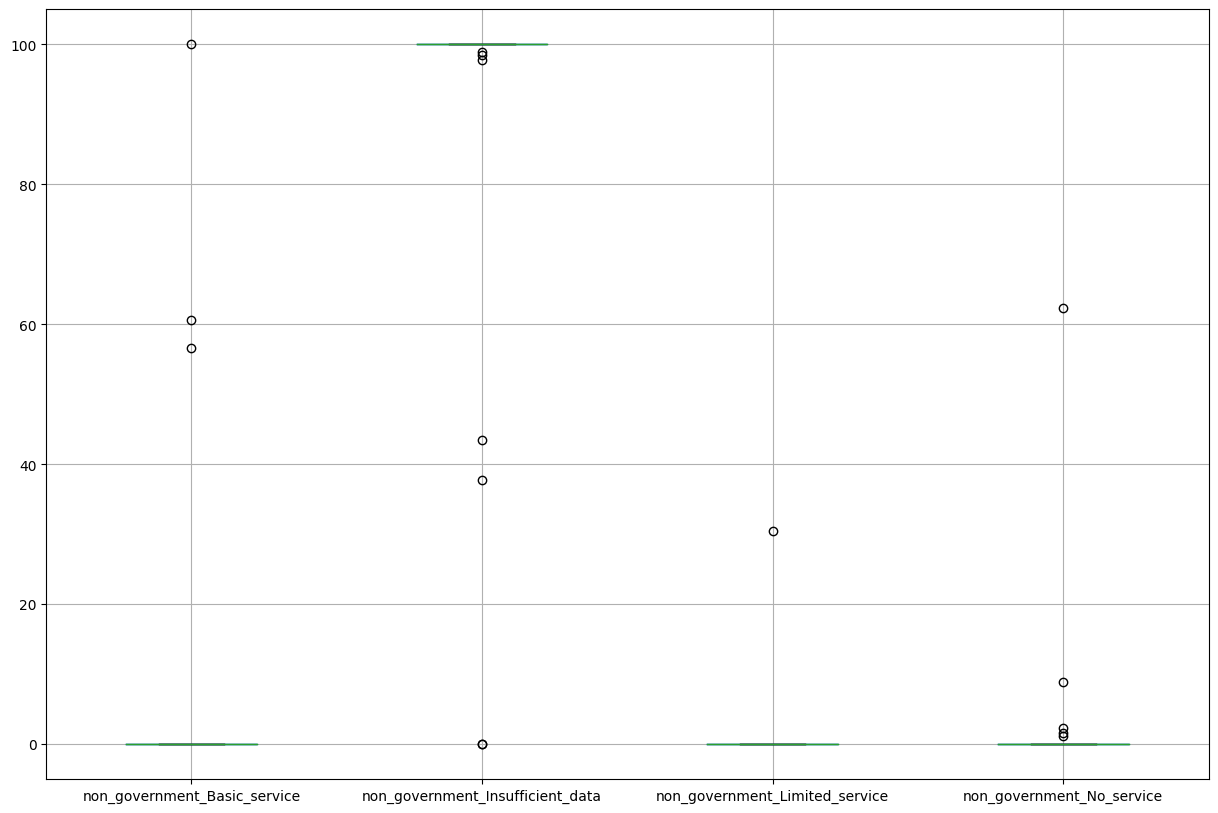

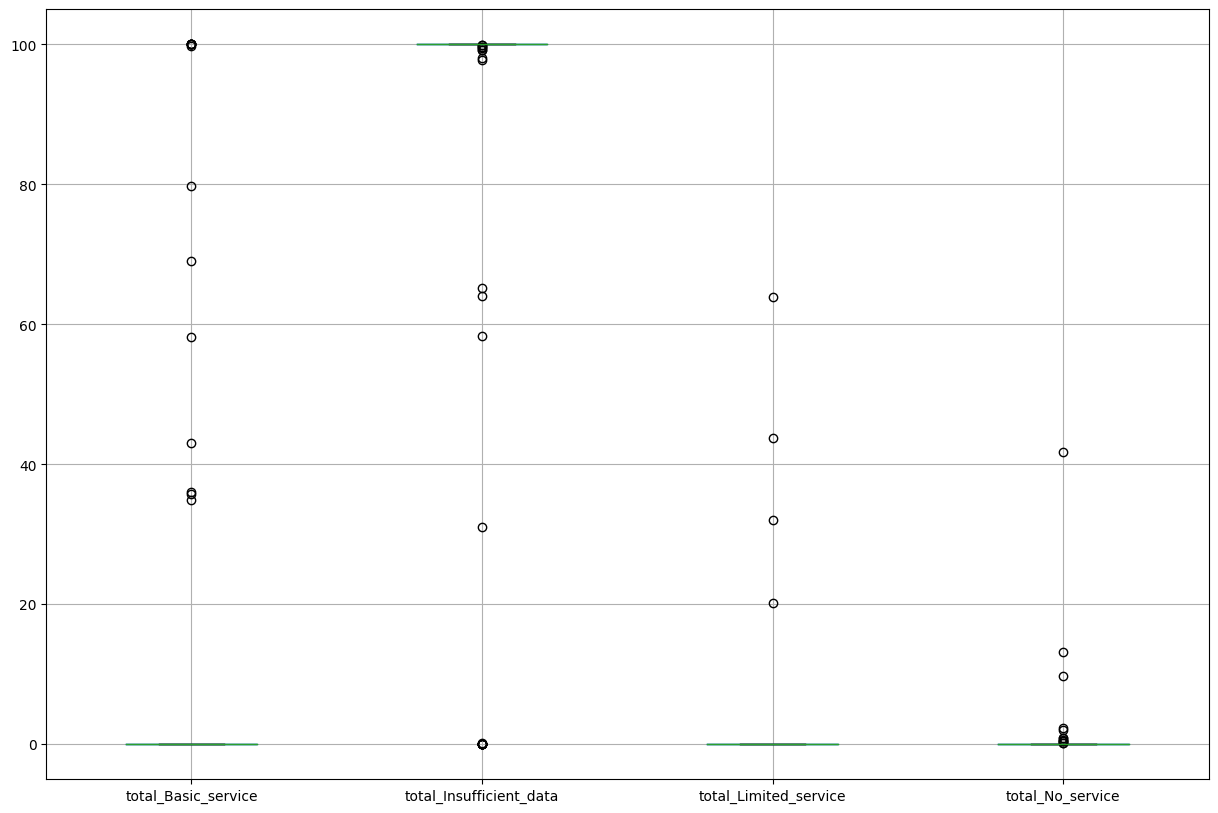

In [17]:
#maybe I could look at the data a little bit differently, maybe looking at the most recent year, 2016.

for i in range(1,len(df_wash5.columns),4):
    df_wash5[df_wash5.columns[i:i+4]].boxplot(figsize = (15,10), fontsize = 10)
    plt.show()

In [18]:
# I am going to go back and look at the old data that is tall
df_wash.boxplot(column = ['CVRG'],  figsize = (15,10), fontsize = 10)

<AxesSubplot:>

In [19]:
df_wash.boxplot(column = ['CVRG'], by = 'SRVC_LVL' , figsize = (15,10), fontsize = 10)

<AxesSubplot:title={'center':'CVRG'}, xlabel='SRVC_LVL'>

In [20]:
df_wash.boxplot(column = ['CVRG'], by = 'FCLT_TYPE' , figsize = (15,10), fontsize = 10)

<AxesSubplot:title={'center':'CVRG'}, xlabel='FCLT_TYPE'>

In [21]:
# just looking at popultion, nothing sticks out as great
df_wash.boxplot(column = ['PPLTN'], figsize = (15,10), fontsize = 10)

<AxesSubplot:title={'center':'CVRG'}, xlabel='FCLT_TYPE'>

In [22]:
#there might be something else going on, but I will continue and only focus on basic levels and limited levels
df_wash6 = df_wash[(df_wash['SRVC_LVL'] == 'Basic service') | (df_wash['SRVC_LVL'] == 'Limited service') ].drop(columns = ['filename','SRVC_TYPE'])

In [23]:
df_wash6.boxplot(column = ['CVRG'],  figsize = (15,10), fontsize = 10)

<AxesSubplot:title={'center':'CVRG'}, xlabel='FCLT_TYPE'>

In [24]:
# I don't know that dropping all that data is great but we shall see what happens

#checking z for outliers, no real need to but just for practice
from scipy.stats import stats
df_wash6['z_score'] = (stats.zscore(df_wash6.CVRG))
df_wash6[df_wash6.z_score.abs()>3] 

,CNTRY_CD,CNTRY,FCLT_TYPE,YR,CVRG,PPLTN,SRVC_LVL,z_score


In [25]:
# Find duplicates
for i in df_wash6.columns :
    if i != 'CVRG':
        vf = [] #placeholder table
        vf = df_wash6.fillna('FILL').groupby([i], as_index = False).agg({'CVRG':'count'}) # fill na's 
        print("{} has {} duplicates and {} are NaN".format(i, vf[vf['CVRG'] > 1 ].CVRG.sum(),vf[vf[i] == 'FILL' ].CVRG.sum() ))

CNTRY_CD has 713 duplicates and 0 are NaN
CNTRY has 713 duplicates and 0 are NaN
FCLT_TYPE has 713 duplicates and 0 are NaN
YR has 713 duplicates and 0 are NaN
PPLTN has 340 duplicates and 0 are NaN
SRVC_LVL has 713 duplicates and 0 are NaN
z_score has 713 duplicates and 0 are NaN


In [26]:
# Fix casing or inconsistent values
#from the looks of it, everything seems fairly consistent
for i in df_wash6.columns :
        print(df_wash6[i].value_counts())

SMR    204
EGY    110
KWT     68
TZA     47
ZWE     42
LTU     38
CZE     34
AZE     34
EST     34
CHN     18
MDV     18
SRB     17
MNE     11
LBR      8
NGA      8
KGZ      8
IND      6
BTN      5
ARM      3
Name: CNTRY_CD, dtype: int64
San Marino                     204
Egypt                          110
Kuwait                          68
United Republic of Tanzania     47
Zimbabwe                        42
Lithuania                       38
Czechia                         34
Azerbaijan                      34
Estonia                         34
China                           18
Maldives                        18
Serbia                          17
Montenegro                      11
Liberia                          8
Nigeria                          8
Kyrgyzstan                       8
India                            6
Bhutan                           5
Armenia                          3
Name: CNTRY, dtype: int64
total             264
hospital          122
urban              86
non_h

In [27]:
# Conduct Fuzzy Matching
# i am going to do this on Country China first to see
from Levenshtein import distance
for i in df_wash6.columns:
    for ii in df_wash6[i].unique():
        if type(ii) == str: 
            for iii in df_wash6[i]:
                if (distance(ii, iii) > 0) & (distance(ii, iii) < 2):
                    print('{}-{} -{}'.format(ii, iii,  distance(ii, iii)))

AZE-CZE -1
AZE-CZE -1
AZE-CZE -1
AZE-CZE -1
AZE-CZE -1
AZE-CZE -1
AZE-CZE -1
AZE-CZE -1
AZE-CZE -1
AZE-CZE -1
AZE-CZE -1
AZE-CZE -1
AZE-CZE -1
AZE-CZE -1
AZE-CZE -1
AZE-CZE -1
AZE-CZE -1
AZE-CZE -1
AZE-CZE -1
AZE-CZE -1
AZE-CZE -1
AZE-CZE -1
AZE-CZE -1
AZE-CZE -1
AZE-CZE -1
AZE-CZE -1
AZE-CZE -1
AZE-CZE -1
AZE-CZE -1
AZE-CZE -1
AZE-CZE -1
AZE-CZE -1
AZE-CZE -1
AZE-CZE -1
CZE-AZE -1
CZE-AZE -1
CZE-AZE -1
CZE-AZE -1
CZE-AZE -1
CZE-AZE -1
CZE-AZE -1
CZE-AZE -1
CZE-AZE -1
CZE-AZE -1
CZE-AZE -1
CZE-AZE -1
CZE-AZE -1
CZE-AZE -1
CZE-AZE -1
CZE-AZE -1
CZE-AZE -1
CZE-AZE -1
CZE-AZE -1
CZE-AZE -1
CZE-AZE -1
CZE-AZE -1
CZE-AZE -1
CZE-AZE -1
CZE-AZE -1
CZE-AZE -1
CZE-AZE -1
CZE-AZE -1
CZE-AZE -1
CZE-AZE -1
CZE-AZE -1
CZE-AZE -1
CZE-AZE -1
CZE-AZE -1


In [28]:
# Looks like it is just country codes that seem to have a close match everything else seems fine.
# Below is a sample of the data set. I might make it wide again if I discover anything else.
# At this point, I am not sure that the data itself is great, but maybe I am just missing something here. 
df_wash6.head()

,CNTRY_CD,CNTRY,FCLT_TYPE,YR,CVRG,PPLTN,SRVC_LVL,z_score
227,AZE,Azerbaijan,total,2000,100.00000,8.122741e+06,Basic service,1.128999
229,AZE,Azerbaijan,total,2000,0.00000,0.000000e+00,Limited service,-1.189191
968,CZE,Czechia,total,2000,100.00000,1.028959e+07,Basic service,1.128999
971,CZE,Czechia,total,2000,0.00000,0.000000e+00,Limited service,-1.189191
1157,EGY,Egypt,total,2000,9.02225,6.307093e+06,Basic service,-0.980038


Sources: <br>
WHO/UNICEF. (n.d.). Home: JMP. Retrieved April 6, 2020, from https://washdata.org/

In [30]:
import sqlite3
# we first need to create a table and define the columns and their variable types
query = """
            CREATE TABLE wash_data
            (
                CNTRY_CD VARCHAR(4),
                CNTRY VARCHAR(50),
                FCLT_TYPE VARCHAR(50),
                YR INTEGER,
                CVRG FLOAT,
                PPLTN INTEGER,
                SRVC_LVL VARCHAR(50)
            );"""

In [31]:
# now we need to create our database or place to store the table
con = sqlite3.connect('WashDash\dsc_540_project.sqlite') 
# commit, keeps the entire transaction, else it will be rolled back once we log out
con.execute(query)
# excecute the create table statement so we have a table set up
con.commit()

In [32]:
#insert statement, '?' are like the placeholders for the variables
stmt = "INSERT INTO wash_data VALUES(?,?,?,?,?,?,?)"
# normally in sql you would have the insert statemnt above and then the data below
# doing it like this tells sqlite to insert and then we have the values after the comma
con.executemany(stmt, df_wash6[df_wash6.columns[:-1]].values.tolist())
con.commit()

In [33]:
# To validate, making sure we have data
cursor = con.execute('''Select * 
                        from wash_data 
                        ''')
rows = cursor.fetchall()
rows

[('AZE', 'Azerbaijan', 'total', 2000, 100.0, 8122741, 'Basic service'),
 ('AZE', 'Azerbaijan', 'total', 2000, 0.0, 0, 'Limited service'),
 ('CZE', 'Czechia', 'total', 2000, 100.0, 10289594, 'Basic service'),
 ('CZE', 'Czechia', 'total', 2000, 0.0, 0, 'Limited service'),
 ('EGY', 'Egypt', 'total', 2000, 9.02225, 6307092.64144, 'Basic service'),
 ('EGY', 'Egypt', 'hospital', 2000, 4.35185, 3042203.5647, 'Basic service'),
 ('EGY',
  'Egypt',
  'non_hospital',
  2000,
  10.02305,
  7006711.72931,
  'Basic service'),
 ('EGY', 'Egypt', 'government', 2000, 5.6369, 3940530.4121, 'Basic service'),
 ('EGY',
  'Egypt',
  'non_government',
  2000,
  27.17925,
  18999922.15632,
  'Basic service'),
 ('EGY', 'Egypt', 'total', 2000, 90.826, 63492809.02784, 'Limited service'),
 ('EGY',
  'Egypt',
  'hospital',
  2000,
  95.64815,
  66863780.4353,
  'Limited service'),
 ('EGY',
  'Egypt',
  'non_hospital',
  2000,
  89.80395,
  62778334.91837,
  'Limited service'),
 ('EGY',
  'Egypt',
  'government',
  

In [34]:
pd.read_sql_query('Select * from wash_data', con)

,CNTRY_CD,CNTRY,FCLT_TYPE,YR,CVRG,PPLTN,SRVC_LVL
0,AZE,Azerbaijan,total,2000,100.00000,8.122741e+06,Basic service
1,AZE,Azerbaijan,total,2000,0.00000,0.000000e+00,Limited service
2,CZE,Czechia,total,2000,100.00000,1.028959e+07,Basic service
3,CZE,Czechia,total,2000,0.00000,0.000000e+00,Limited service
4,EGY,Egypt,total,2000,9.02225,6.307093e+06,Basic service
...,...,...,...,...,...,...,...
708,ZWE,Zimbabwe,rural,2016,32.90000,3.597431e+06,Limited service
709,ZWE,Zimbabwe,hospital,2016,34.80000,5.620326e+06,Limited service
710,ZWE,Zimbabwe,non_hospital,2016,31.50000,5.087364e+06,Limited service
711,ZWE,Zimbabwe,government,2016,35.10000,5.668777e+06,Limited service


In [35]:
query = """
            CREATE TABLE wash_data_wide
            (
                CNTRY_CD VARCHAR(4),
                YR INTEGER,
                PPLTN FLOAT,
                urban_Basic_service FLOAT,
                urban_Insufficient_data FLOAT,
                urban_Limited_service FLOAT,
                urban_No_service FLOAT,
                rural_Basic_service FLOAT,
                rural_Insufficient_data FLOAT,
                rural_Limited_service FLOAT,
                rural_No_service FLOAT,
                hospital_Basic_service FLOAT,
                hospital_Insufficient_data FLOAT,
                hospital_Limited_service FLOAT,
                hospital_No_service FLOAT,
                non_hospital_Basic_service FLOAT,
                non_hospital_Insufficient_data FLOAT,
                non_hospital_Limited_service FLOAT,
                non_hospital_No_service FLOAT,
                government_Basic_service FLOAT,
                government_Insufficient_data FLOAT,
                government_Limited_service FLOAT,
                government_No_service FLOAT,
                non_government_Basic_service FLOAT,
                non_government_Insufficient_data FLOAT,
                non_government_Limited_service FLOAT,
                non_government_No_service FLOAT,
                total_Basic_service FLOAT,
                total_Insufficient_data FLOAT,
                total_Limited_service FLOAT,
                total_No_service FLOAT

            );"""

In [36]:
con.execute(query)

In [37]:
#insert statement, '?' are like the placeholders for the variables
stmt = "INSERT INTO wash_data_wide VALUES(?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)"
# normally in sql you would have the insert statemnt above and then the data below
# doing it like this tells sqlite to insert and then we have the values after the comma
con.executemany(stmt, df_wash5.reset_index().values.tolist())
con.commit()

In [38]:
df_wash5.reset_index().columns

Index(['CNTRY_CD', 'YR', 'PPLTN', 'urban_Basic_service',
       'urban_Insufficient_data', 'urban_Limited_service', 'urban_No_service',
       'rural_Basic_service', 'rural_Insufficient_data',
       'rural_Limited_service', 'rural_No_service', 'hospital_Basic_service',
       'hospital_Insufficient_data', 'hospital_Limited_service',
       'hospital_No_service', 'non_hospital_Basic_service',
       'non_hospital_Insufficient_data', 'non_hospital_Limited_service',
       'non_hospital_No_service', 'government_Basic_service',
       'government_Insufficient_data', 'government_Limited_service',
       'government_No_service', 'non_government_Basic_service',
       'non_government_Insufficient_data', 'non_government_Limited_service',
       'non_government_No_service', 'total_Basic_service',
       'total_Insufficient_data', 'total_Limited_service', 'total_No_service'],
      dtype='object')

In [39]:
pd.read_sql_query('Select * from wash_data_wide', con)

,CNTRY_CD,YR,PPLTN,urban_Basic_service,urban_Insufficient_data,urban_Limited_service,urban_No_service,rural_Basic_service,rural_Insufficient_data,rural_Limited_service,...,government_Limited_service,government_No_service,non_government_Basic_service,non_government_Insufficient_data,non_government_Limited_service,non_government_No_service,total_Basic_service,total_Insufficient_data,total_Limited_service,total_No_service
0,AFG,2016,34656032.0,0.0,100.0,0.0,0.0,0.0,100.0,0.0,...,0.0,0.0,0.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0
1,AGO,2016,28813462.0,0.0,100.0,0.0,0.0,0.0,100.0,0.0,...,0.0,0.0,0.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0
2,AND,2016,77281.0,0.0,100.0,0.0,0.0,0.0,100.0,0.0,...,0.0,0.0,0.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0
3,ARM,2016,2924816.0,0.0,100.0,0.0,0.0,0.0,100.0,0.0,...,0.0,0.0,0.0,100.0,0.0,0.0,69.0,31.0,0.0,0.0
4,ATG,2016,100963.0,0.0,100.0,0.0,0.0,0.0,100.0,0.0,...,0.0,0.0,0.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,WSM,2016,195125.0,0.0,100.0,0.0,0.0,0.0,100.0,0.0,...,0.0,0.0,0.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0
121,YEM,2016,27584212.0,0.0,100.0,0.0,0.0,0.0,100.0,0.0,...,0.0,0.0,0.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0
122,ZAF,2016,56015472.0,0.0,100.0,0.0,0.0,0.0,100.0,0.0,...,0.0,0.0,0.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0
123,ZMB,2016,16591391.0,0.0,100.0,0.0,0.0,0.0,100.0,0.0,...,0.0,0.0,0.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0
